In [39]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Importing Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv")

# Exploratory Data Analysis (EDA)

In [3]:
# checking dimensions of the dataset
df.shape

(30, 17)

In [4]:
# printing first 5 rows of the dataset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
# checking the coloumns of the dataset
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Ther are two different types of data (int64, float64) present in this dataset.

In [7]:
# checking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing values exist in this dataset.

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can see all columns having count 30. Looks like it dosen't contain missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No need to change the datatype they are appropriate so we can skip the step of data conversion Now directly jumps to Visualization

# Data Visualization

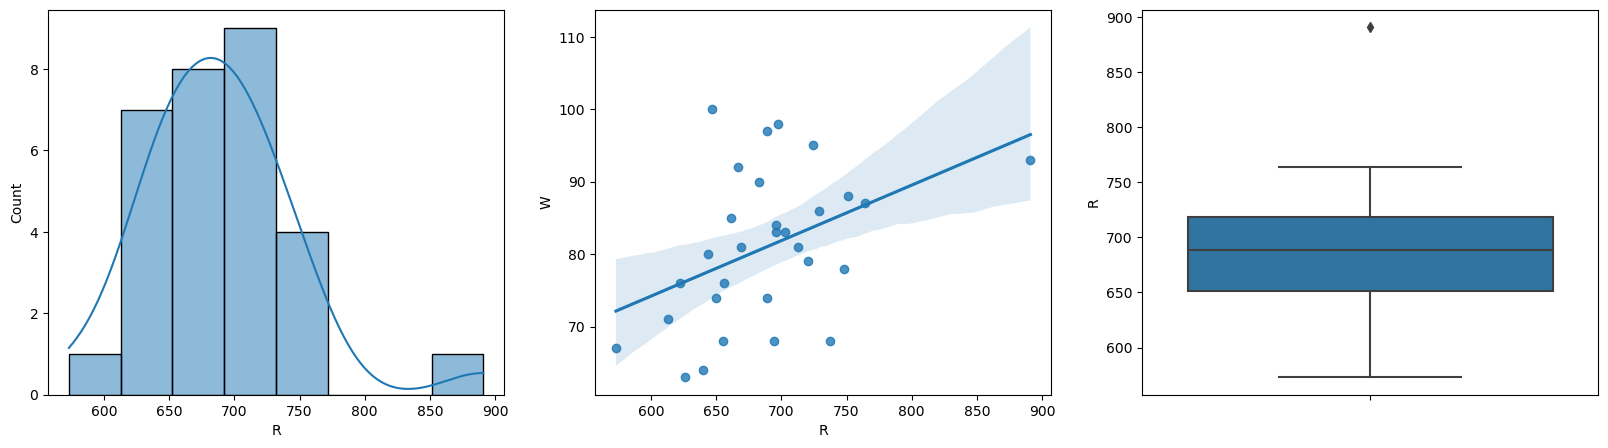

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='R',data=df)
plt.show()

Runs and wins are linearly correlated. And outliers are present between 850 and 900.

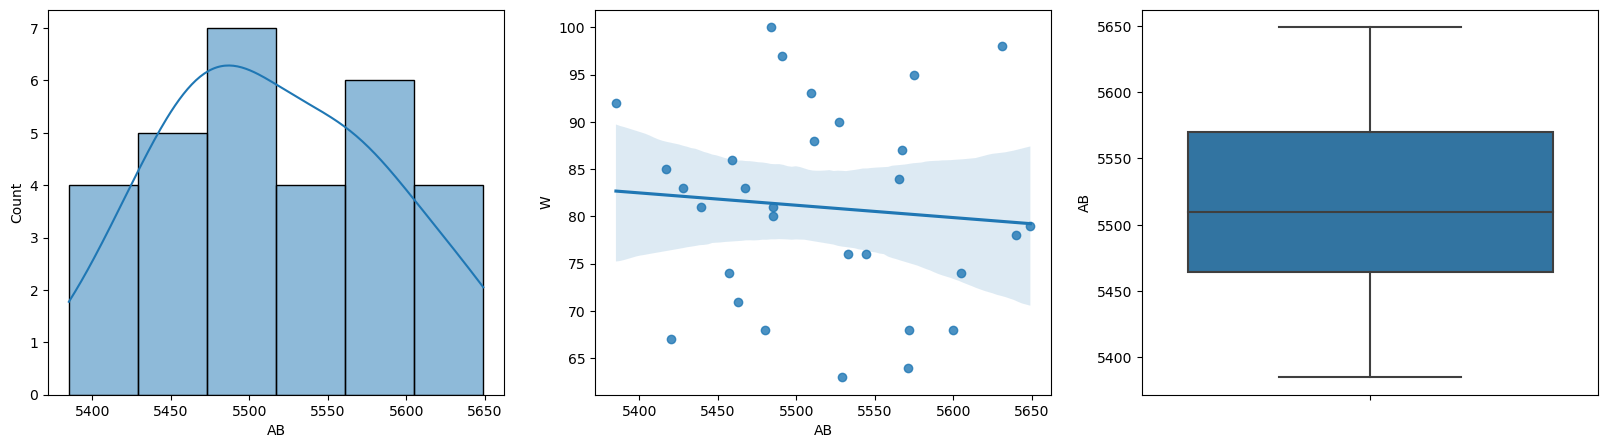

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='AB',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='AB',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='AB',data=df)
plt.show()

At balls is very weekly related to Wins With no outliers.

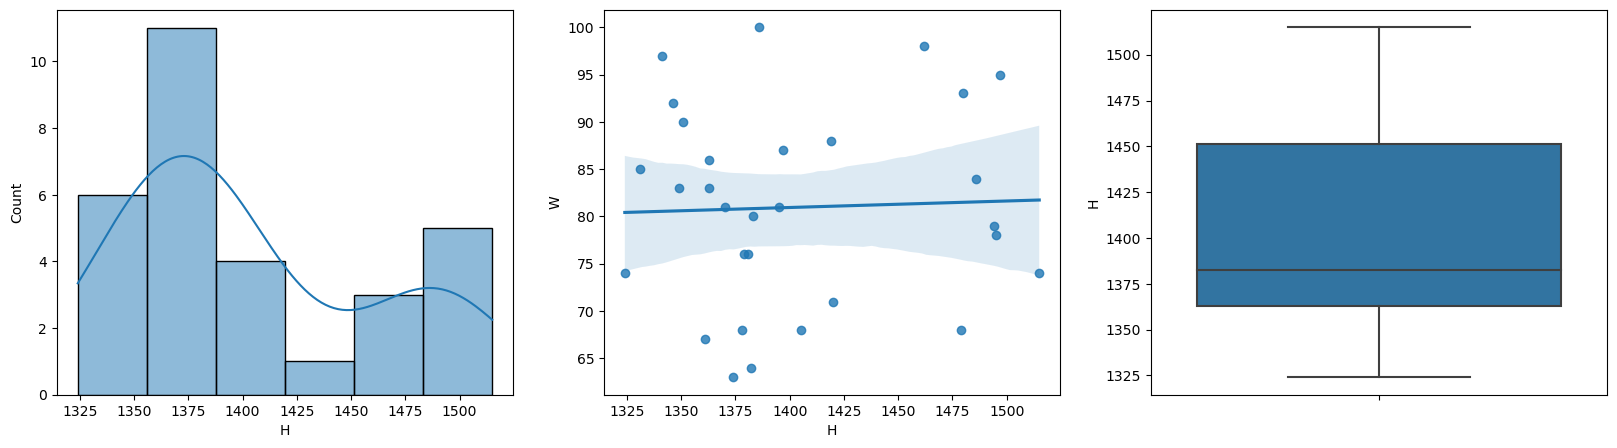

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='H',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='H',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='H',data=df)
plt.show()

Hits are also very weekly related to winning with no outliers.

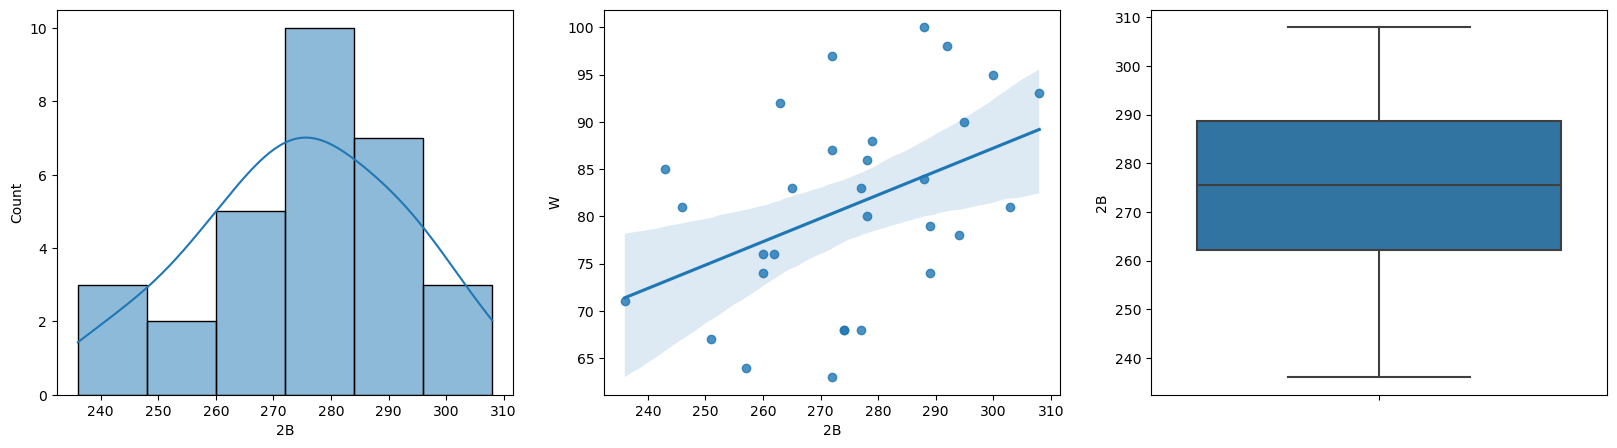

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='2B',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='2B',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='2B',data=df)
plt.show()

Doubles are linearly related with Wins, with no outlier, and data is left-skewed.

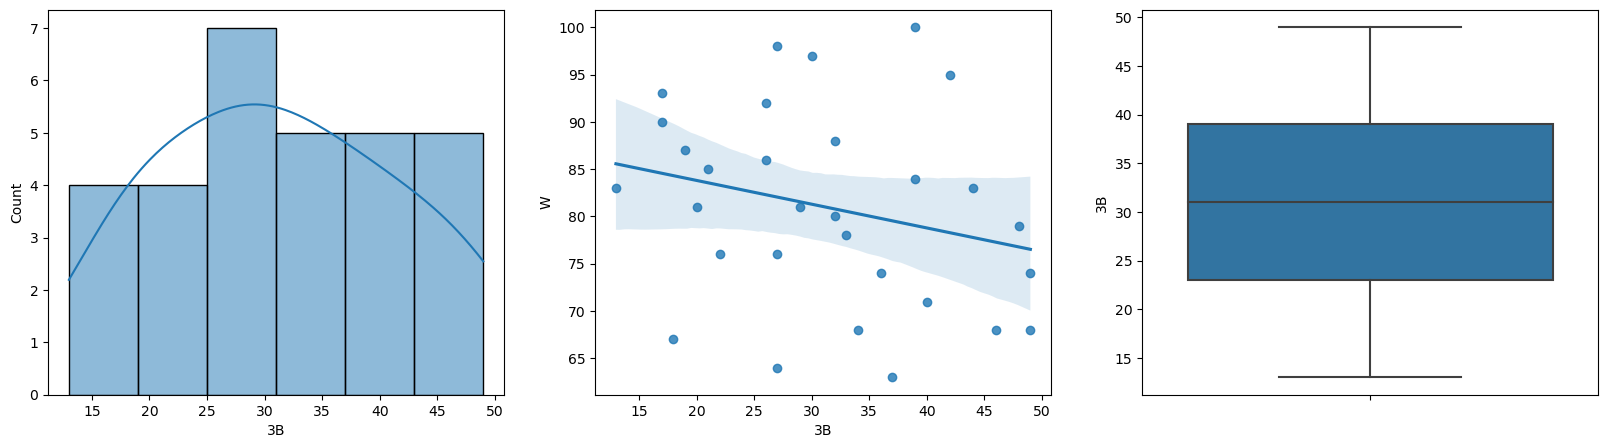

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='3B',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='3B',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='3B',data=df)
plt.show()

Triple has very weak negative correlations with win with no outlier and data is right-skewed.

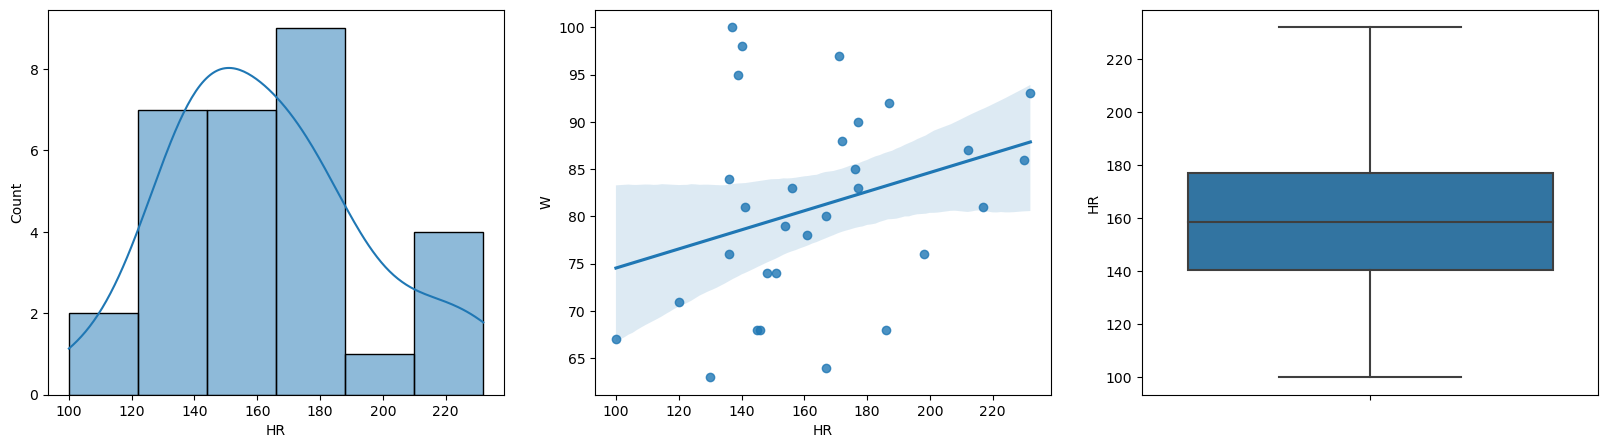

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='HR',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='HR',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='HR',data=df)
plt.show()

The home run has a very low correlation with wins with no outliers and data is right-skewed.

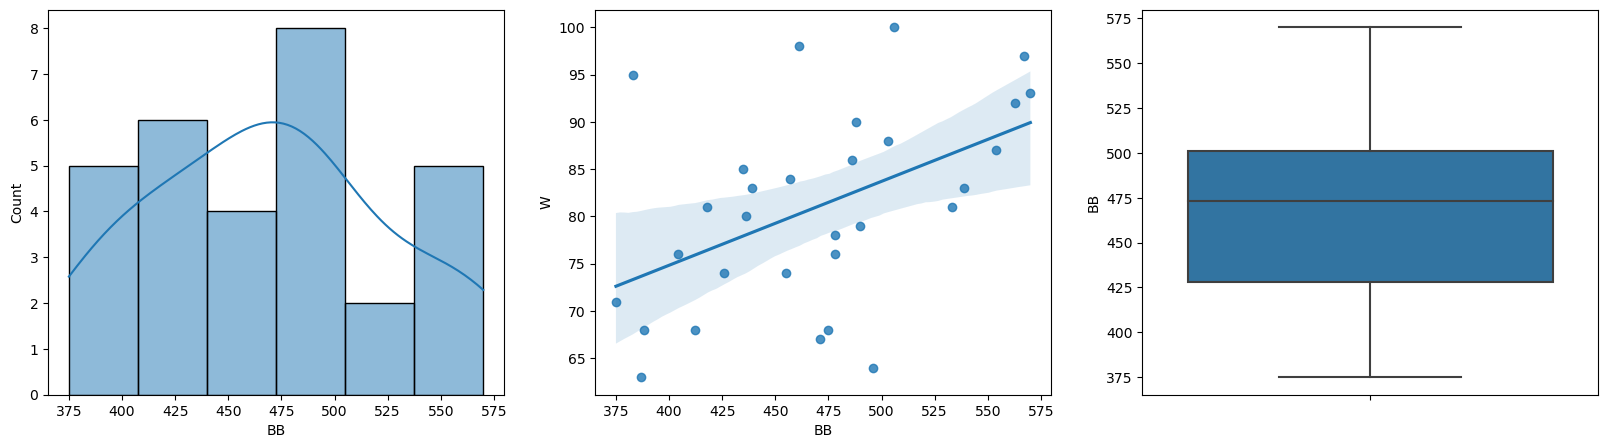

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='BB',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='BB',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='BB',data=df)
plt.show()

Walk is lightly correlated to win with no outlier.

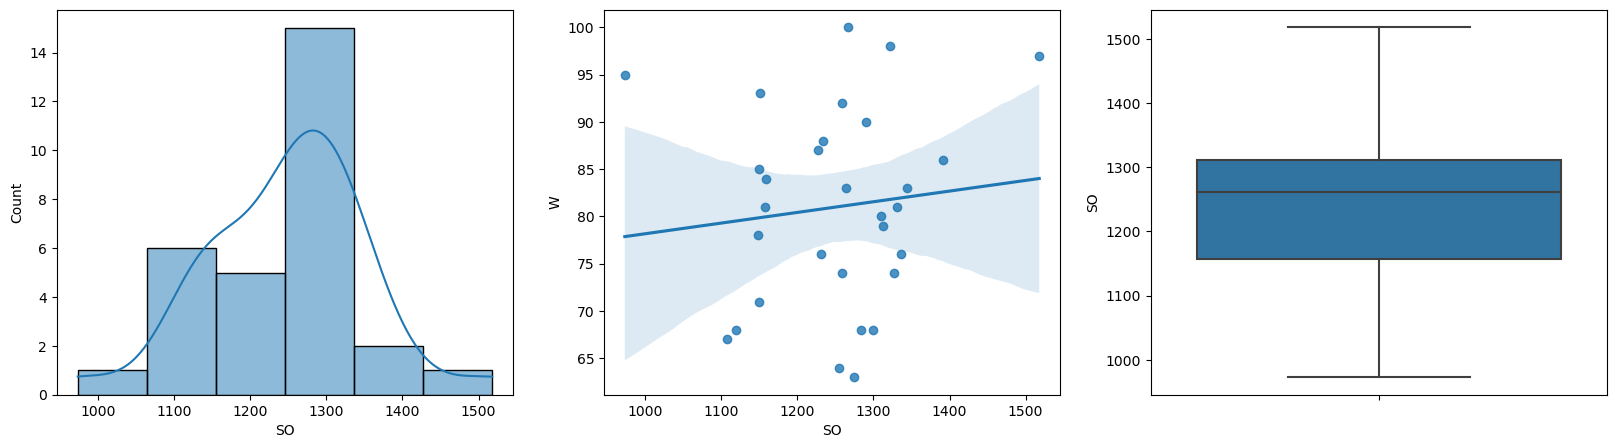

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SO',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='SO',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='SO',data=df)
plt.show()

Strikeout is not correlated to win with no outlier and the dataset is left-skewed.

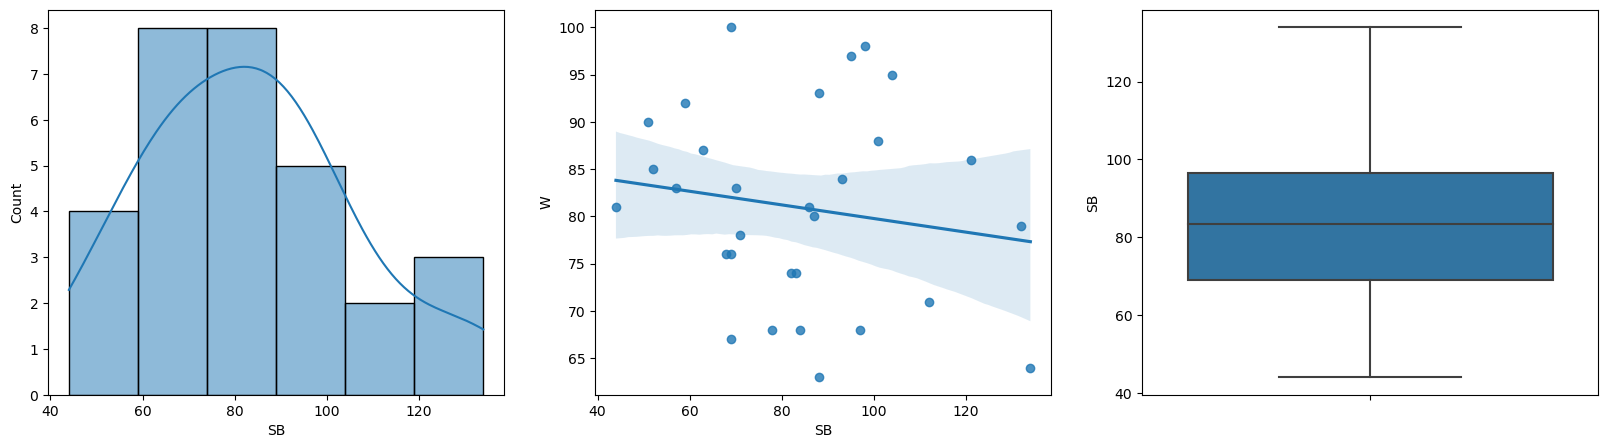

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SB',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='SB',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='SB',data=df)
plt.show()

Stolen Bases is not correlated to win with no outlier.

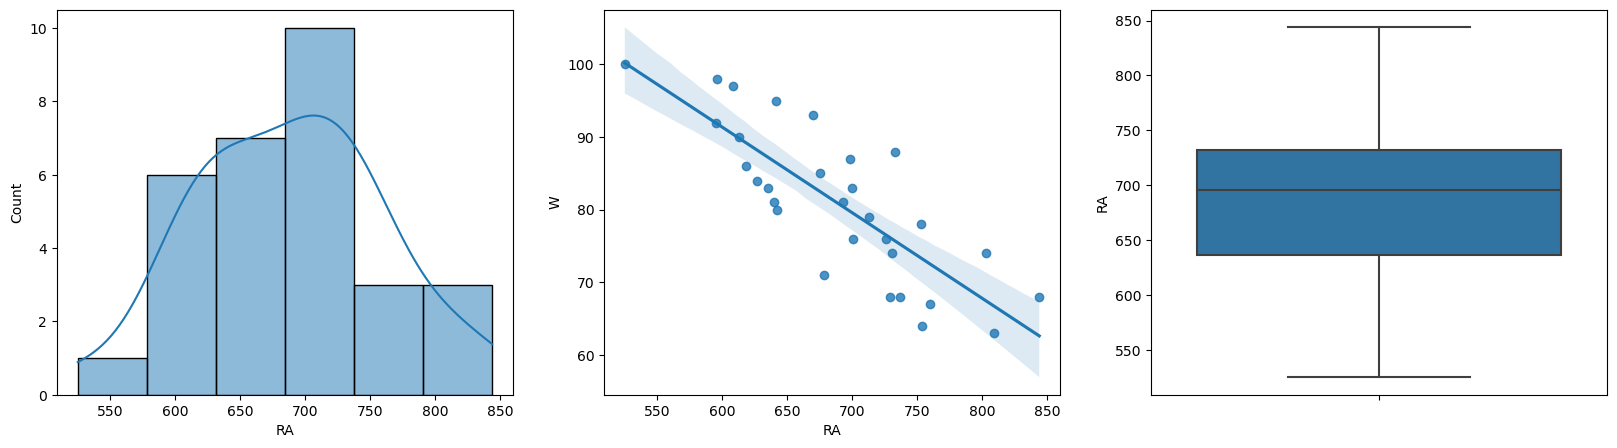

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='RA',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='RA',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='RA',data=df)
plt.show()

Runs Allowed is highly correlated to win with no outliers.

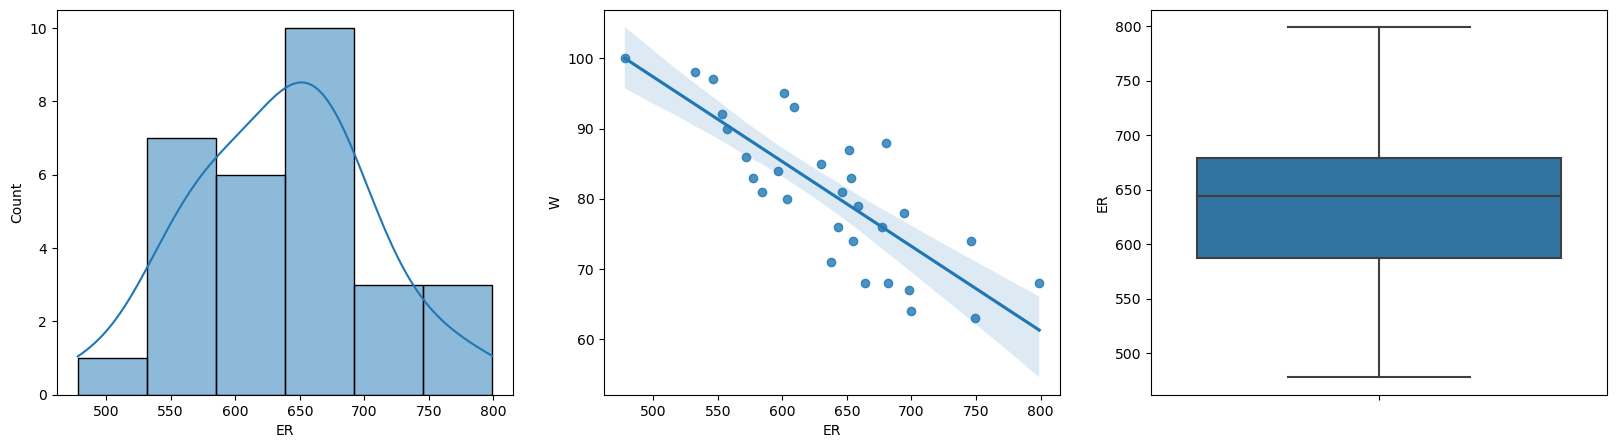

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ER',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='ER',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='ER',data=df)
plt.show()

Earned Runs is highly correlated to win with no outliers.

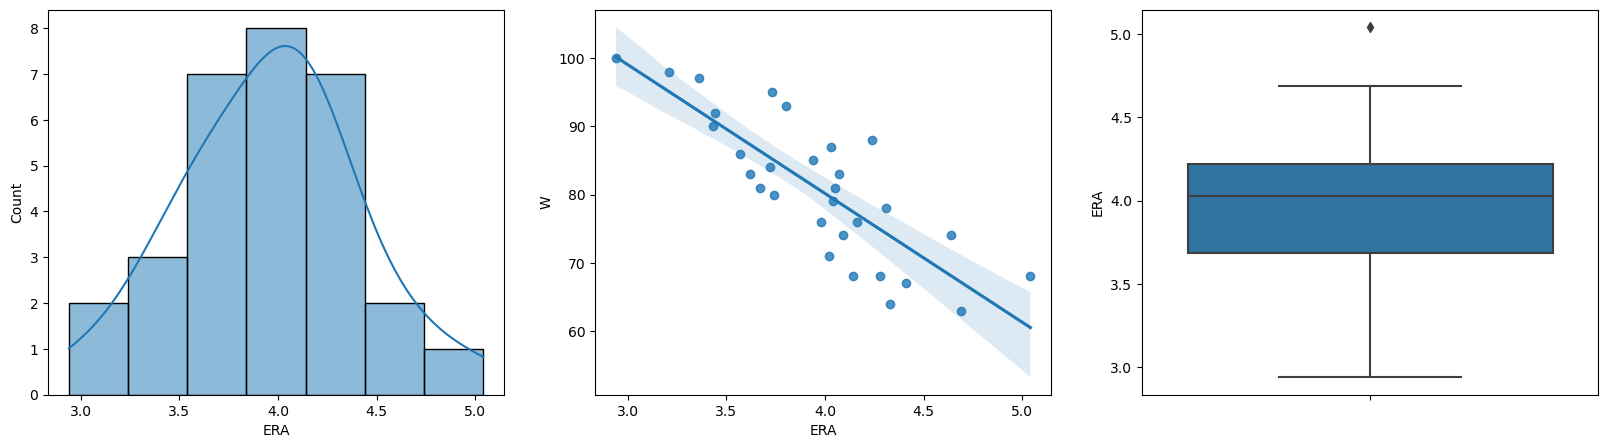

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ERA',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='ERA',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='ERA',data=df)
plt.show()

Earned Run Average (ERA) is correlated to win with no outliers and data is right-skewed.

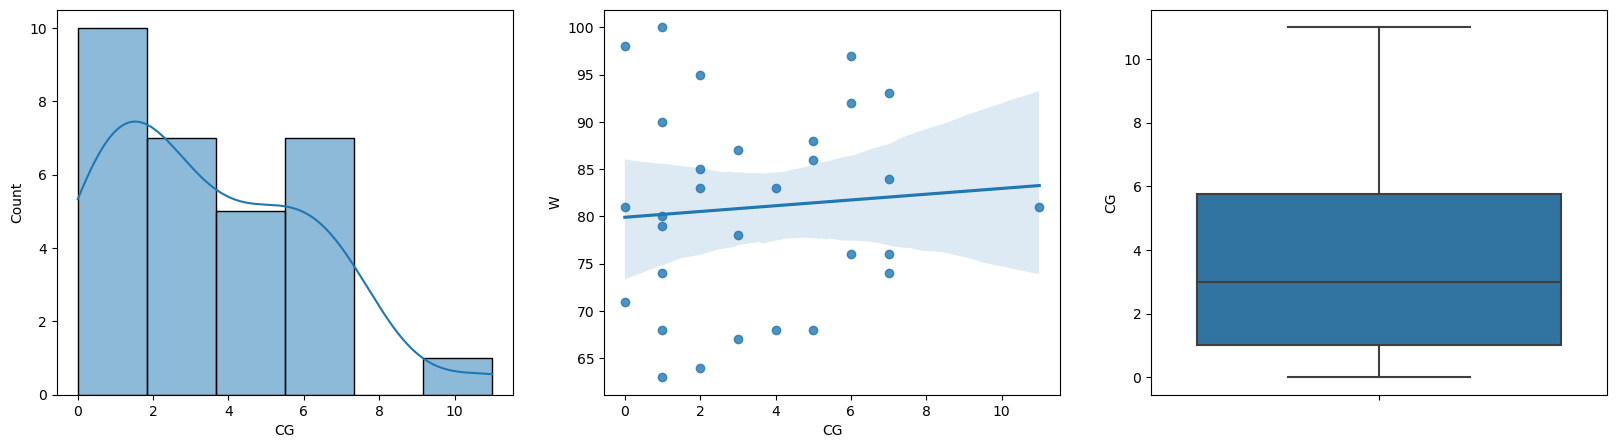

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='CG',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='CG',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='CG',data=df)
plt.show()

Complete Game(CG) is not corelated to win with no outliears.

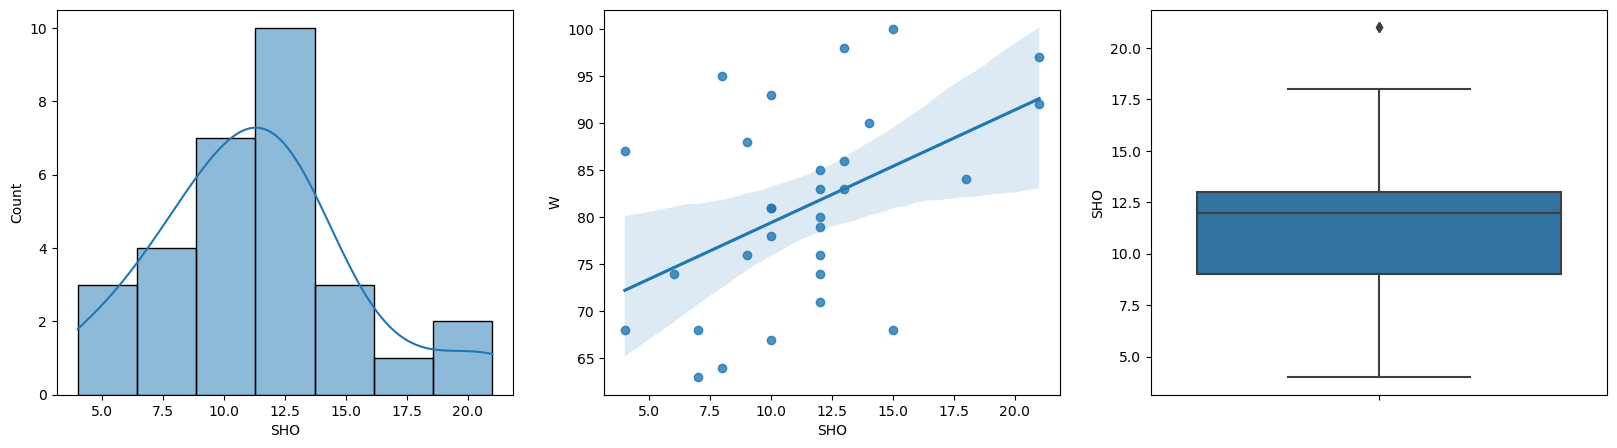

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SHO',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='SHO',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='SHO',data=df)
plt.show()

Shutouts are highly correlated to win with no outliers and data is right-skewed.

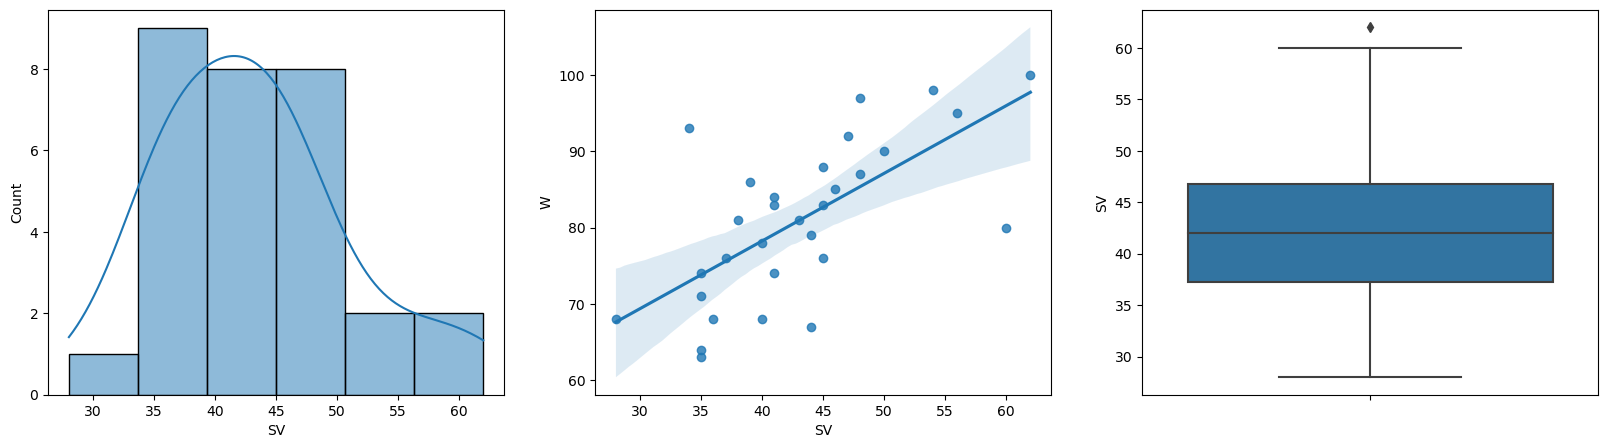

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SV',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='SV',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='SV',data=df)
plt.show()

Saves are lightly correlated to win with no outliers-skewed.

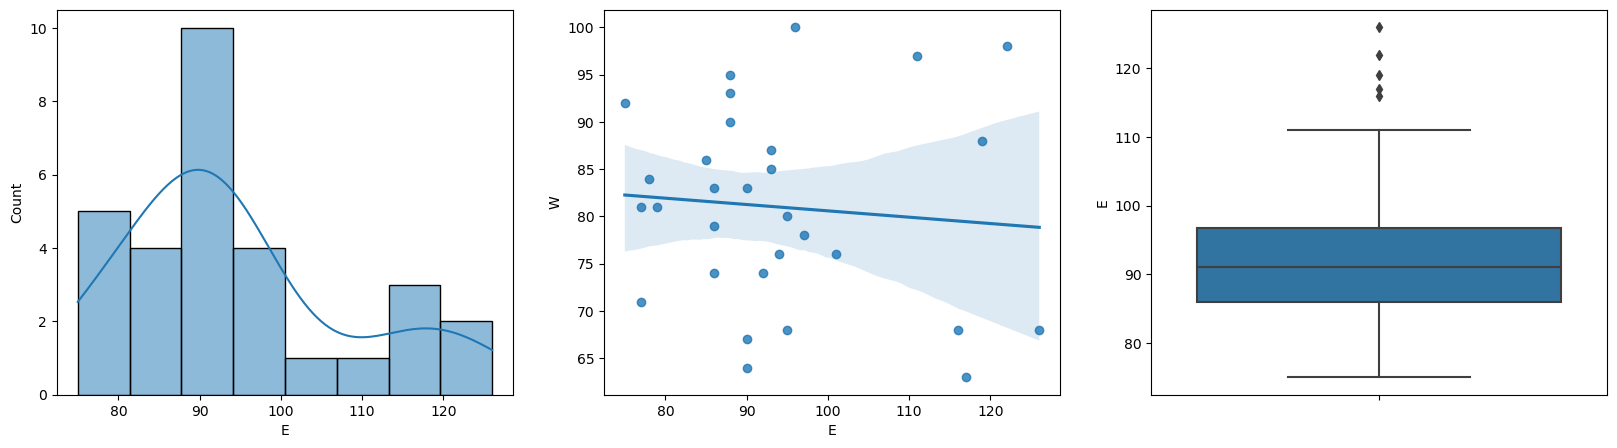

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='E',data=df,kde=True)

plt.subplot(1,3,2)
sns.regplot(x='E',y='W',data=df)

plt.subplot(1,3,3)
sns.boxplot(y='E',data=df)
plt.show()

Errors are not correlated to win, the data has outliers and data is right-skewed.

# Model Predictions

In [40]:
X=df.iloc[:,1:14]
y=df['W']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Creating and Training the Model

In [42]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5.771157135561462
MSE: 45.750384480631475
RMSE: 6.763903050800733


In [46]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.0
MSE: 62.0
RMSE: 7.874007874011811


In [49]:
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5.433333333333333
MSE: 62.75819999999998
RMSE: 7.9220073213801045


As we can see the RMSE is lowest in LinearRegression, so the LinearRegression Regressor is the best model in this case.

### Lets see final Actual Vs Predicted sample.

,Y Test,Pred
27,79,78.17
15,100,83.65
23,67,71.18
17,97,87.58
8,80,80.33


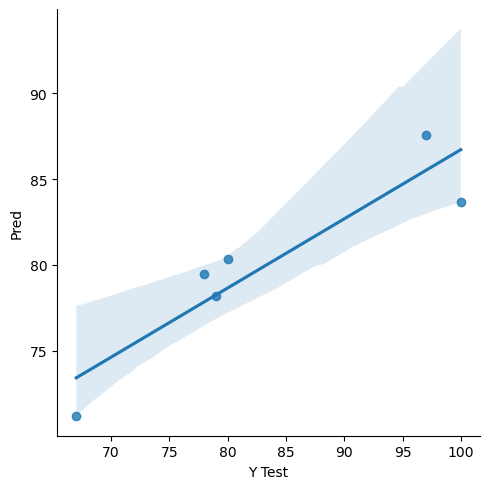

In [51]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()